- Sequential 모델: 차례대로 쌓은 층. 딥러닝의 구조를 짜고 층을 설정하는 부분

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [5]:
# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784) # 텐서 모양변환
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32)/255.0 #ndarray로 변환
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)# 원핫코드로 변환
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [6]:
n_input = 784
n_hidden = 1024
n_output = 10

In [13]:
mlp = Sequential()
mlp.add(Dense(units=n_hidden, activation='tanh', input_shape=(n_input,),kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

In [14]:
mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

Epoch 1/30
469/469 - 11s - loss: 0.0424 - accuracy: 0.8435 - val_loss: 0.0289 - val_accuracy: 0.9085 - 11s/epoch - 24ms/step
Epoch 2/30
469/469 - 11s - loss: 0.0223 - accuracy: 0.9292 - val_loss: 0.0187 - val_accuracy: 0.9435 - 11s/epoch - 23ms/step
Epoch 3/30
469/469 - 10s - loss: 0.0164 - accuracy: 0.9479 - val_loss: 0.0148 - val_accuracy: 0.9517 - 10s/epoch - 22ms/step
Epoch 4/30
469/469 - 10s - loss: 0.0136 - accuracy: 0.9574 - val_loss: 0.0136 - val_accuracy: 0.9578 - 10s/epoch - 22ms/step
Epoch 5/30
469/469 - 10s - loss: 0.0120 - accuracy: 0.9631 - val_loss: 0.0121 - val_accuracy: 0.9615 - 10s/epoch - 22ms/step
Epoch 6/30
469/469 - 10s - loss: 0.0108 - accuracy: 0.9675 - val_loss: 0.0107 - val_accuracy: 0.9654 - 10s/epoch - 22ms/step
Epoch 7/30
469/469 - 10s - loss: 0.0100 - accuracy: 0.9709 - val_loss: 0.0106 - val_accuracy: 0.9666 - 10s/epoch - 22ms/step
Epoch 8/30
469/469 - 10s - loss: 0.0093 - accuracy: 0.9739 - val_loss: 0.0098 - val_accuracy: 0.9685 - 10s/epoch - 22ms/step


In [15]:
res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

정확률은 97.7400004863739


In [16]:
import matplotlib.pyplot as plt

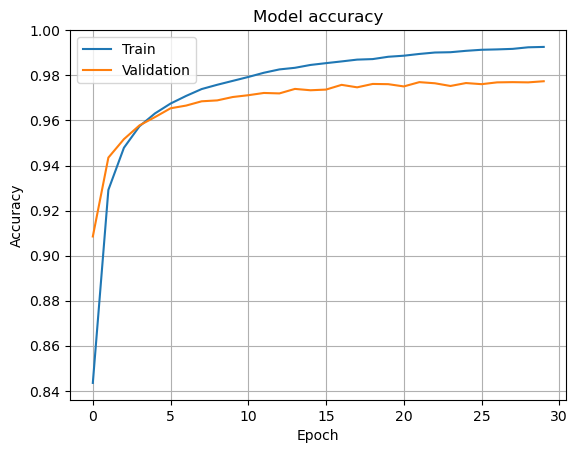

In [17]:
# 정확률 곡선
plt.plot(hist.history['accuracy']) # 훈련 데이터의 정확률
plt.plot(hist.history['val_accuracy']) # 검증 데이터의 정확률
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.grid()
plt.show()

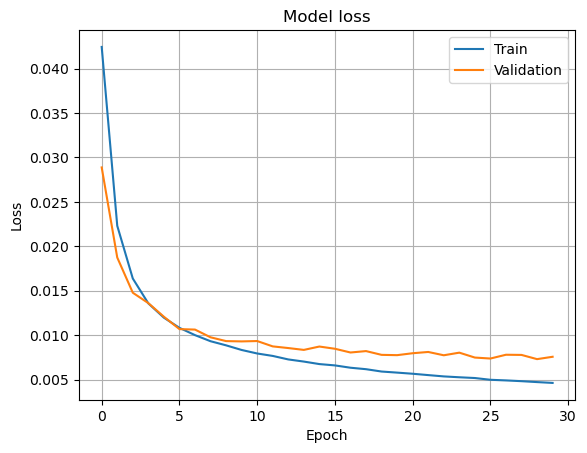

In [18]:
# 손실 함수 곡선 => 오차율
plt.plot(hist.history['loss']) # 훈련 데이터의 오차율
plt.plot(hist.history['val_loss']) # 검증 데이터의 오차율
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.grid()
plt.show()